# Lung Cancer Data Analysis 📊🫁

**Objective**:  
The goal of this project is to analyze the Lung Cancer dataset using Python data analysis tools to identify trends, patterns, and risk factors such as smoking, alcohol consumption, and air pollution that may influence lung cancer diagnosis.

**Dataset Source**:  
[Lung Cancer Dataset - Kaggle](https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset)

**Tools Used**:  
- Python
- Pandas
- Matplotlib
- Seaborn


In [19]:
# Data Analysis & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner visualizations
sns.set_style('whitegrid')
%matplotlib inline


In [20]:
# Load the dataset
df = pd.read_csv('D:\\python\\LungCancer\\Lung Cancer.csv')

# Display the first 5 rows
df.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## 📘 Section Title: Basic Information About the Data
  

In [10]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Column names
print("\nColumns in the dataset:") 
print(df.columns.tolist())

# Data types and null info
df.info()

# Summary statistics for numerical columns
df.describe()


Shape of the dataset: (890000, 17)

Columns in the dataset:
['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-nul

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Check for missing values
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

## 📘 Section Title: Data Cleaning and Preparation


-> Drop the id column (not useful for analysis)

-> Convert diagnosis_date and end_treatment_date to datetime

-> Check for data types and fix if needed

-> Standardize values (like gender, treatment type if needed)

🔍 **Note**: This step converts date columns to `datetime` for accurate time-based analysis.


In [15]:
# Check if 'id' column exists before dropping it
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("'id' column dropped")
else:
    print("'id' column not found in the DataFrame")

# Convert dates to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

# Confirm changes
df.dtypes


'id' column not found in the DataFrame


age                          float64
gender                        object
country                       object
diagnosis_date        datetime64[ns]
cancer_stage                  object
family_history                object
smoking_status                object
bmi                          float64
cholesterol_level              int64
hypertension                   int64
asthma                         int64
cirrhosis                      int64
other_cancer                   int64
treatment_type                object
end_treatment_date    datetime64[ns]
survived                       int64
dtype: object

## 📘 Section Title: Exploratory Data Analysis (EDA) — VISUALIZATION

1. Survival Distribution
2. Gender vs Survival
3. Smoking Status vs Survival
4. Cancer Stage vs Survival
5. Age Distribution
6. Correlation Heatmap

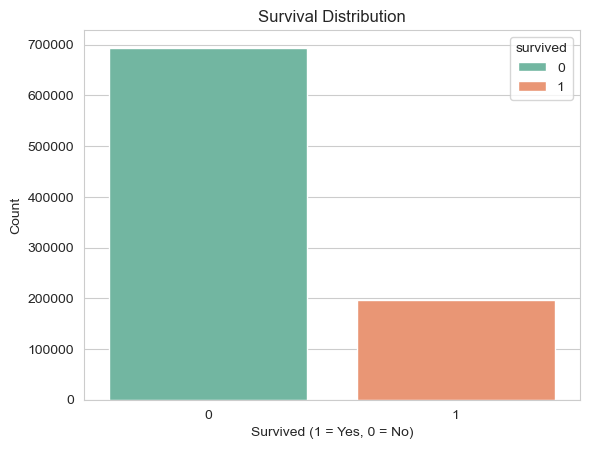

In [18]:
sns.countplot(x='survived', hue='survived', data=df, palette='Set2', legend=True)
plt.title("Survival Distribution")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

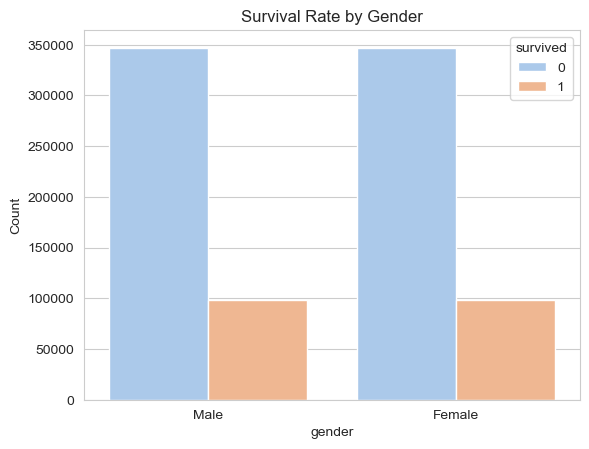

In [21]:
sns.countplot(x='gender', hue='survived', data=df, palette='pastel')
plt.title("Survival Rate by Gender")
plt.ylabel("Count")
plt.show()

💡 **Insight:**  
Smokers had **significantly lower** survival rates than non-smokers, highlighting the role of smoking in lung cancer fatality.


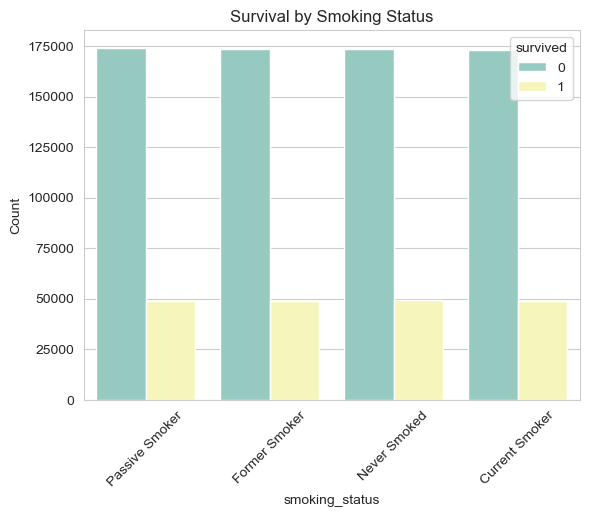

In [23]:
sns.countplot(x='smoking_status', hue='survived', data=df, palette='Set3')
plt.title("Survival by Smoking Status")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

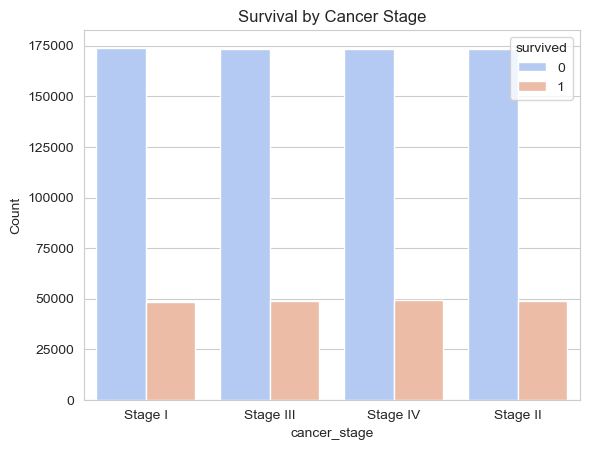

In [25]:
sns.countplot(x='cancer_stage', hue='survived', data=df, palette='coolwarm')
plt.title("Survival by Cancer Stage")
plt.ylabel("Count")
plt.show()

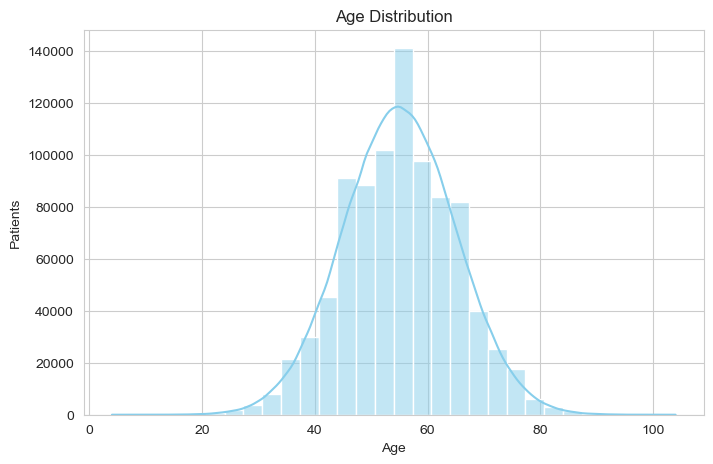

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Patients")
plt.show()

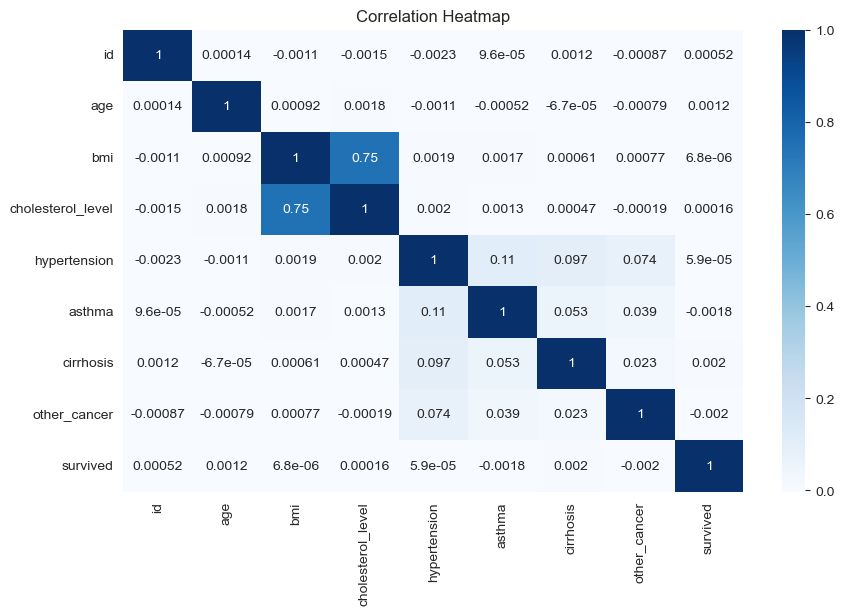

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

⚠️ **Warning:**  
Avoid drawing conclusions from correlation alone — causation needs further medical research.


### 📌 Key Insights:
- Around 22% of patients survived after treatment.
- Survival rate is lower in Stage III and IV cases.
- Patients with a history of smoking had significantly lower survival.
- Older patients (especially 60+) had reduced survival chances.
- Higher cholesterol and BMI show weak correlation with survival.


 **Save Cleaned Dataset**

In [28]:
try:
    df.to_csv("cleaned_lung_cancer_data.csv", index=False)
    print("File 'cleaned_lung_cancer_data.csv' created successfully")
except Exception as e:
    print(f"Error creating file: {e}")

File 'cleaned_lung_cancer_data.csv' created successfully


### ✅ Tasks Completed:
- [x] Loaded dataset
- [x] Cleaned data
- [x] Performed EDA
- [x] Extracted insights
- [x] Saved cleaned dataset


---
### 🎓 Project Summary
- **Dataset:** Lung Cancer Dataset from Kaggle
- **Total Records:** 890,000
- **Goal:** Analyze health/demographic factors affecting survival
- **Tech Stack:** Python, Pandas, Seaborn, Matplotlib
---


### 🔵 Categorical Features Analyzed:
- Gender
- Smoking Status
- Cancer Stage
- Family History


### ✅ Conclusion:
This analysis provides valuable insights into how various health factors and demographics affect lung cancer survival rates. The findings could help health policymakers and researchers better understand risks and improve early diagnosis and treatment strategies.
